In [9]:
# LOAD THE DATASET

import pandas as pd

FILE_PATH = "../data/agaricus-lepiota.data"
headers = pd.read_csv(FILE_PATH, nrows=0).columns.tolist()

shrooms = pd.read_csv(FILE_PATH, usecols=headers, sep=",")
shrooms_dummies = pd.get_dummies(shrooms.drop('edibility', axis=1))


In [68]:
# Define helper functions

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def get_score_from_clustering(data, n_clusters: int = 2):
  kmeans_model = KMeans(n_clusters=n_clusters)
  labels = kmeans_model.fit_predict(data)
  return [silhouette_score(data, labels), labels]

def plot_scores(k_vals, scores):
  plt.plot(k_vals, scores, label='silhouette_score', color='blue')
  plt.scatter(k_vals, scores, color='blue', zorder=5)

  plt.xlabel('n_clusters')
  plt.ylabel('score')
  plt.title('Silhouette score for each number of clusters')
  plt.legend()

  plt.grid(True)
  plt.show()

In [70]:
k_vals = range(2, 31)
scores = []

for i in k_vals:
  score, label = get_score_from_clustering(data=shrooms_dummies, n_clusters=i)
  scores.append(score)
  print(i, scores[i - k_vals[0]])


2 0.13712690608621847
3 0.21591966205500285
4 0.22534652135569389
5 0.25418714597264586
6 0.2650070067518968
7 0.20379662193928785
8 0.2224970267076729
9 0.1638340995355519
10 0.1847521463886885
11 0.1343594513724631
12 0.14894175423332823
13 0.20347279911650434
14 0.19882044589821707
15 0.16261097591076415
16 0.10888500433849023
17 0.12123644300304559
18 0.1367119258259518
19 0.13804258361046431
20 0.15217053243710776
21 0.13695454422447365
22 0.13960633596019045
23 0.12254705322103648
24 0.1509619656661986
25 0.15026496304845616
26 0.15309609101665925
27 0.15081596320340168
28 0.13825923140345742
29 0.15592394633237347
30 0.14096564214571364


In [69]:
from sklearn.decomposition import PCA

shrooms_pca_3 = PCA(n_components=3, random_state=42).fit_transform(shrooms_dummies)

k_vals = range(2, 31)
scores_pca_3 = []

for i in k_vals:
  score, label = get_score_from_clustering(data=shrooms_pca_3, n_clusters=i)
  scores_pca_3.append(score)
  print(i, scores_pca_3[i - k_vals[0]])

2 0.45511081696926486
3 0.6044432177136039
4 0.663687249992853
5 0.6588657238964422
6 0.5650620909695144
7 0.5590989000873466
8 0.5421707149579689
9 0.522802841996883
10 0.4873790371599759
11 0.3775913541757804
12 0.39290070181754716
13 0.40606313827616447
14 0.47491002826221396
15 0.4021743418175499
16 0.43957076170269455
17 0.36020806905796465
18 0.42330987451587176
19 0.3599002673977624
20 0.35172525160372436
21 0.3449170215190965
22 0.36162944006278697
23 0.35259268555689
24 0.3473641860510927
25 0.355755797452262
26 0.3430150248824382
27 0.34470875032683906
28 0.35454393782695826
29 0.34999875025808147
30 0.3436702669112666


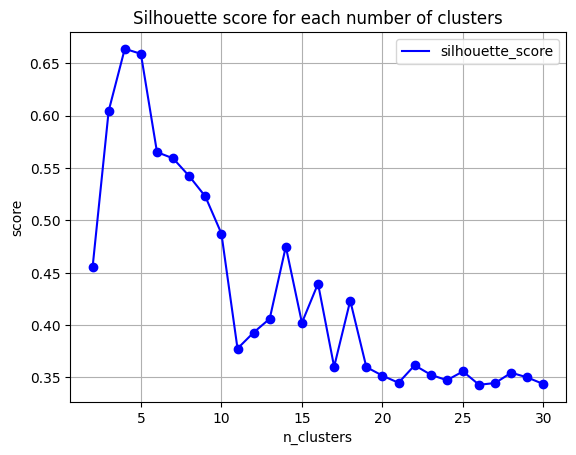

In [71]:
plot_scores(k_vals=k_vals, scores=scores_pca_3)

In [72]:
#Decide optimal amount of clusters
optimal_k = 4
optimal_k

4

In [75]:
from sklearn.decomposition import PCA

score_pca_optimal, label_pca_optimal = get_score_from_clustering(data=shrooms_pca_3, n_clusters=optimal_k)
score_pca_optimal

np.float64(0.663687249992853)

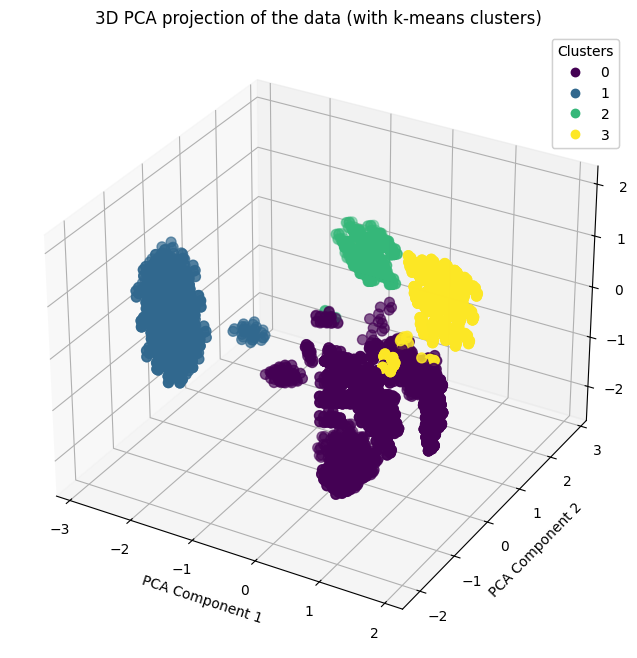

In [76]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point with color representing its cluster
scatter = ax.scatter(shrooms_pca_3[:, 0], shrooms_pca_3[:, 1], shrooms_pca_3[:, 2], 
                     c=label_pca_optimal, cmap='viridis', s=50)

# Add labels and title
ax.set_title('3D PCA projection of the data (with k-means clusters)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()